#### Importing Libs

In [1]:
import os, sys
from dotenv import load_dotenv
import pandas as pd
import re
import numpy as np
from collections import Counter
sys.path.insert(1, '..\classes')
from PlottingData import PlotData as pltd
from ProcessingData import ProcessData as proc

#### Enviroment Vars

In [2]:
load_dotenv()
RAW_DATA_PATH = os.getenv('RAW_DATA_PATH')
PROCESSED_DATA_PATH = os.getenv('PROCESSED_DATA_PATH')

#### Instance objects

In [3]:
plotter = pltd()
processor = proc()

#### Load data

In [4]:
df_tmp = pd.read_csv(RAW_DATA_PATH+'dataframe_IMDB.csv')
df_tmp.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Process data

In [5]:
data_cleaned = processor.clean_whole_text(df_tmp, column_to_clean='review')

In [6]:
data_cleaned['target'] = np.where(data_cleaned['sentiment'] == 'positive', 1, 0)

#### Exploratory Data Analysis

In [7]:
df_tmp.isnull().sum()

review       0
sentiment    0
dtype: int64

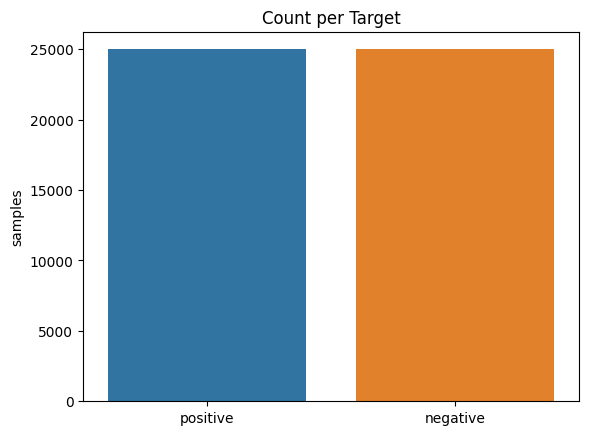

In [8]:
plotter.plot_target_balance(
    data=data_cleaned, 
    column_target='target', 
    dict_map_classes={
        0:'negative',
        1:'positive'})

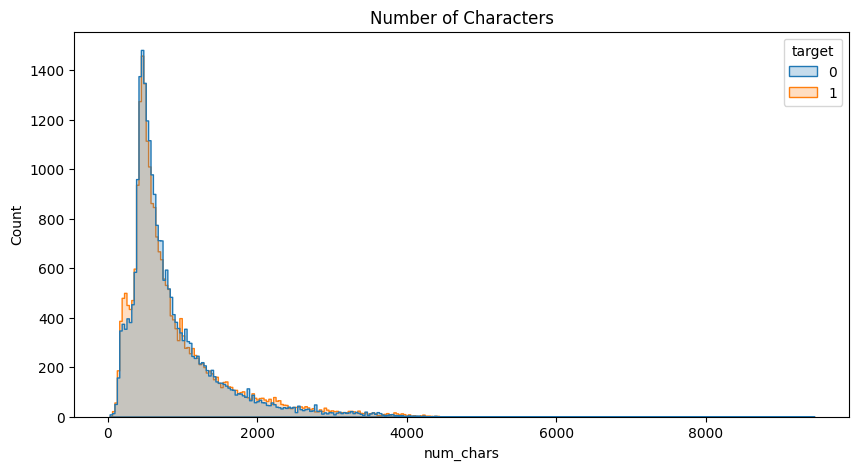

In [9]:
plotter.plot_num_char_per_text(data_cleaned, 'review')

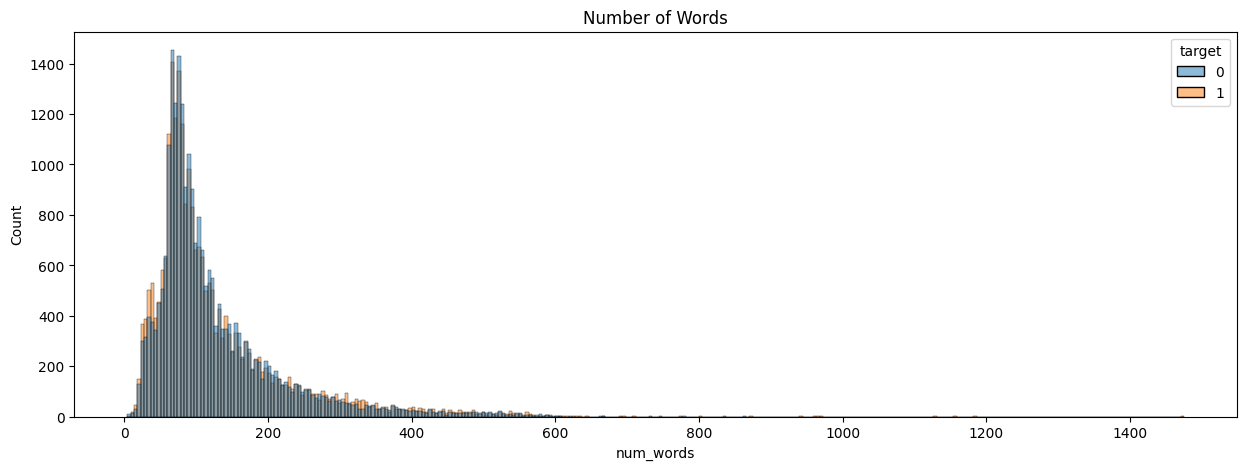

In [10]:
plotter.plot_number_of_words(data_cleaned, 'review')

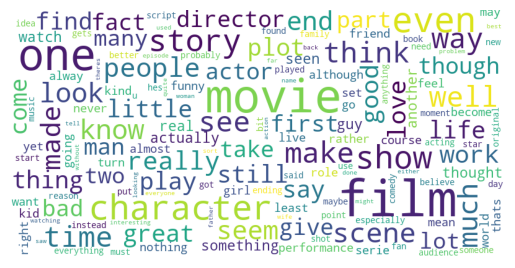

In [11]:
plotter.plot_wordcloud(data_cleaned, 'review', 'target')

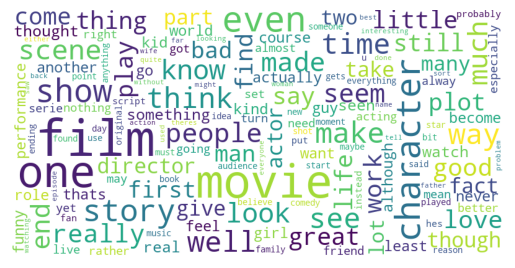

In [12]:
plotter.plot_wordcloud(data=data_cleaned, column_text='review', column_target='target', target=1)

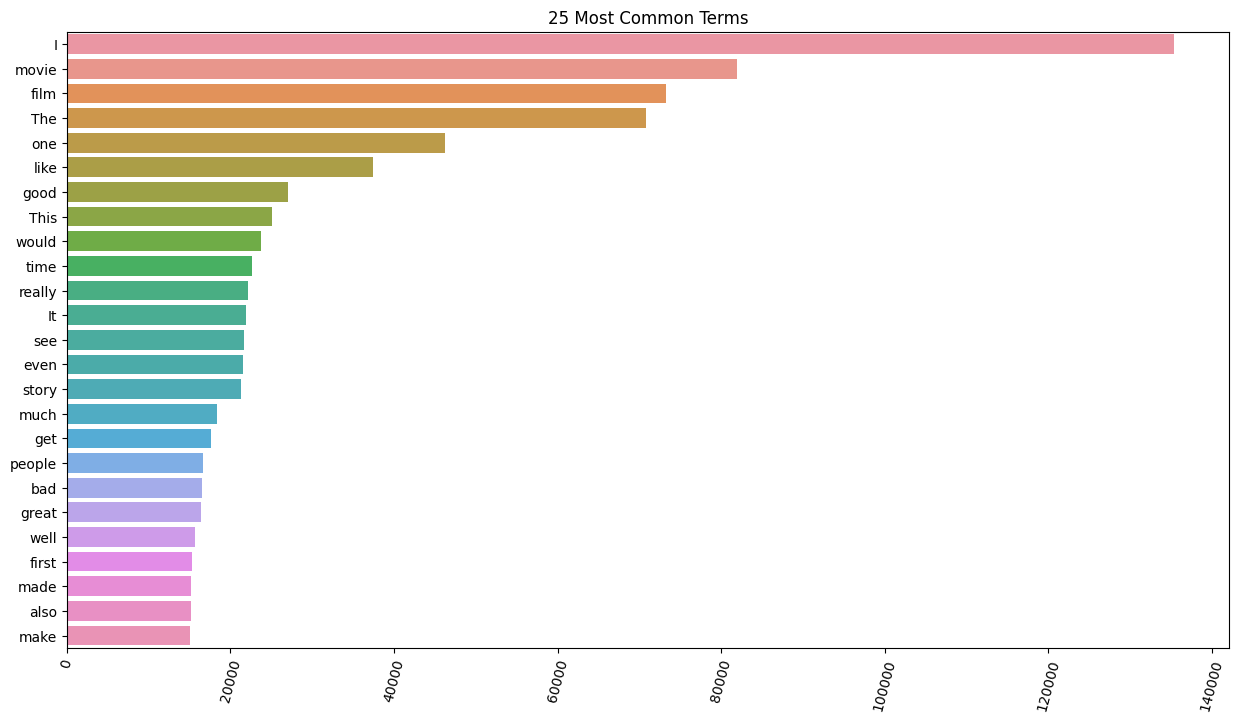

In [13]:
plotter.plot_most_common_terms(data_cleaned, 'review', 'target', 25)

In [14]:
#data_cleaned.to_csv(PROCESSED_DATA_PATH+'train_data_cleaned.csv', index=False)